In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


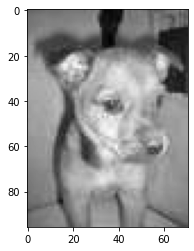

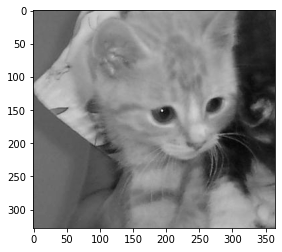

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2

Data_dir='/content/drive/MyDrive/PetImages'
Categories=['Dog','Cat']
for category in Categories:
  path=os.path.join(Data_dir,category)
  for img in os.listdir(path):
    img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)#CONVERTED TO GRAYSCALE TO SAVE SPACE
    plt.imshow(img_array,cmap='gray')
    plt.show()
    break

when you print array you notice that it is 2d, but if we had not converted the image to grayscale then it will no longer be 2d because (r,g,b) values will also be included

In [6]:
print(img_array)

[[108 108 108 ...  58  62  64]
 [108 108 108 ...  55  58  60]
 [108 108 109 ...  54  57  59]
 ...
 [105 105 105 ... 136 130 126]
 [105 105 105 ... 121 117 114]
 [105 105 105 ... 105 102 100]]


In [8]:
print(img_array.shape)

(328, 364)


different images are of different shape, therefore inorder to simplify let us converted everything to same shape

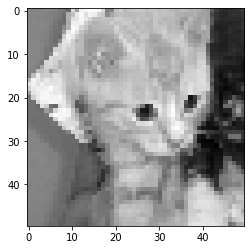

In [9]:
IMG_SIZE=50#we can change this based on how well trained
new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()

In [10]:
training_data=[]
def create_training_data():
  for category in Categories:
    path=os.path.join(Data_dir,category)
    class_num=Categories.index(category)
    for img in os.listdir(path):
      try:#some of the images are broken
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)#CONVERTED TO GRAYSCALE TO SAVE SPACE
        new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass#you can also display and error
create_training_data()

In [11]:
print(len(training_data))

23278


shuffle the data set bcoz now it is in order

In [12]:
import random
random.shuffle(training_data)

In [13]:
for sample in training_data:
  print(sample[1])

Streaming output truncated to the last 5000 lines.
0
1
1
0
0
1
1
1
1
1
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
1
0
1
1
1
1
1
0
1
0
1
1
1
1
0
0
1
1
1
0
1
0
1
1
1
0
0
1
1
1
1
1
1
1
0
0
0
1
0
0
1
0
0
0
0
1
0
1
0
0
1
0
1
0
1
0
1
1
1
1
1
0
1
1
0
0
0
1
1
1
1
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
0
0
0
1
1
1
1
1
1
0
0
0
0
1
0
1
0
1
1
0
0
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
0
0
0
1
1
0
1
0
1
0
0
1
1
0
1
1
1
0
1
1
0
1
0
0
0
0
1
0
0
1
0
1
0
0
0
0
1
0
1
0
0
0
1
0
0
1
1
1
0
1
1
0
0
0
0
0
0
0
1
1
1
0
0
0
1
0
0
1
1
1
0
0
0
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
1
1
0
0
0
1
0
0
1
1
0
1
1
0
1
1
0
1
1
0
0
1
1
0
0
1
0
0
1
0
1
0
1
0
1
0
1
1
1
1
0
1
1
1
0
1
1
1
1
1
1
1
0
1
1
1
0
0
1
0
1
0
0
0
1
1
0
1
0
0
1
0
0
0
0
0
1
1
0
0
1
1
0
0
0
1
0
0
1
1
0
1
1
1
0
1
0
1
0
0
0
0
1
1
0
0
1
0
0
1
1
0
1
0
1
0
0
1
1
1
0
1
0
1
1
0
1
0
1
1
1
1
0
0
1
1
0
0
0
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
0
0
0
0
1
1
0
1
1
1
0
0
1
1
0
0
1
1
1
1
0
1
0
1
0
0
1
1
0
1
1
1
1
0
0
0
1
0
1
1
1
0
0
0
1
1
1
0
0
0
1
0
0
1
0
1
0
0
1
1
0
0
1
0
0
0
0
1
0
1
1
0
0
0
1
1
0
0
0
0
1
0
1
0

In [16]:
X=[]
y=[]

In [17]:
for features,labels in training_data:
  X.append(features)
  y.append(labels)

In [19]:
X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [20]:
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [21]:
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)

In [22]:
X[1]

array([[[133],
        [136],
        [126],
        ...,
        [203],
        [205],
        [208]],

       [[129],
        [131],
        [114],
        ...,
        [203],
        [205],
        [207]],

       [[130],
        [107],
        [109],
        ...,
        [204],
        [204],
        [207]],

       ...,

       [[ 89],
        [106],
        [ 98],
        ...,
        [122],
        [128],
        [125]],

       [[119],
        [110],
        [122],
        ...,
        [154],
        [137],
        [106]],

       [[113],
        [116],
        [104],
        ...,
        [122],
        [124],
        [116]]], dtype=uint8)